In [6]:
# plotting inline
%matplotlib inline

# working directory
#import os; os.chdir('/home/gdmarmerola/ts_demo')

# importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta as beta_dist
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

# turning off automatic plot showing, and setting style
plt.ioff()
plt.style.use('fivethirtyeight')

In [7]:
# class for our row of bandits
class MAB:
    
    # initialization
    def __init__(self, bandit_probs):
        
        # storing bandit probs
        self.bandit_probs = bandit_probs
        
    # function that helps us draw from the bandits
    def draw(self, k):

        # we return the reward and the regret of the action
        return np.random.binomial(1, self.bandit_probs[k]), np.max(self.bandit_probs) - self.bandit_probs[k]

In [8]:
# defining a set of bandits with known probabilites
bandit_probs = [0.35, 0.40, 0.30, 0.25]

In [39]:
for i in range(5):
    print(np.random.binomial(1, 0.1))

0
1
0
0
0


In [9]:
# instance of our MAB class
mab = MAB(bandit_probs)

In [11]:
# number of draws
N_DRAWS = 500

# number of bandits
N_BANDITS = len(mab.bandit_probs)

# numpy arrays for accumulating draws, bandit choices and rewards, more efficient calculations
k_array = np.zeros((N_BANDITS,N_DRAWS))
reward_array = np.zeros((N_BANDITS,N_DRAWS))

# lists for ease of use, visualization
k_list = []
reward_list = []

# opening figure and setting style
fig, ax = plt.subplots(figsize=(9, 3), dpi=150)
ax.set(xlim=(-1, N_DRAWS), ylim=(-0.5, N_BANDITS-0.5))

# colors for each bandit
bandit_colors = ['red', 'green', 'blue', 'purple']

# loop generating draws
for draw_number in range(N_DRAWS):
    
    # choosing arm and drawing
    k = np.random.choice(range(N_BANDITS),1)[0]
    reward, regret = mab.draw(k)
    
    # record information about this draw
    k_list.append(k)
    reward_list.append(reward)
    k_array[k, draw_number] = 1
    reward_array[k, draw_number] = reward
      
    # getting list of colors that tells us the bandit
    color_list = [bandit_colors[k] for k in k_list]
    
    # getting list of facecolors that tells us the reward
    facecolor_list = [['none', bandit_colors[k_list[i]]][r] for i, r in enumerate(reward_list)]    
    
# initializing with first data
scatter = ax.scatter(y=[k_list[0]], x=[list(range(N_DRAWS))[0]], color=[color_list[0]], linestyle='-', marker='o', s=30, facecolor=[facecolor_list[0]]);

# titles
plt.title('Random draws from the row of slot machines (MAB)', fontsize=10)
plt.xlabel('Round', fontsize=10); plt.ylabel('Bandit', fontsize=10);
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['{}\n($\\theta = {}$)'.format(i, bandit_probs[i]) for i in range(4)])
ax.tick_params(labelsize=10)
fig.tight_layout()

# function for updating
def animate(i):
    x = list(range(N_DRAWS))[:i]
    y = k_list[:i]
    scatter.set_offsets(np.c_[x, y])
    scatter.set_color(color_list[:i])
    scatter.set_facecolor(facecolor_list[:i])
    ax.set_yticks([0,1,2,3])
    ax.set_yticklabels(['{}\n($\\theta = {}$)'.format(i, bandit_probs[i]) for i in range(4)])
    ax.tick_params(labelsize=10)
    return (scatter,)

# function for creating animation
anim = FuncAnimation(fig, animate, frames=N_DRAWS, interval=25, blit=True)

# showing
HTML(anim.to_html5_video())

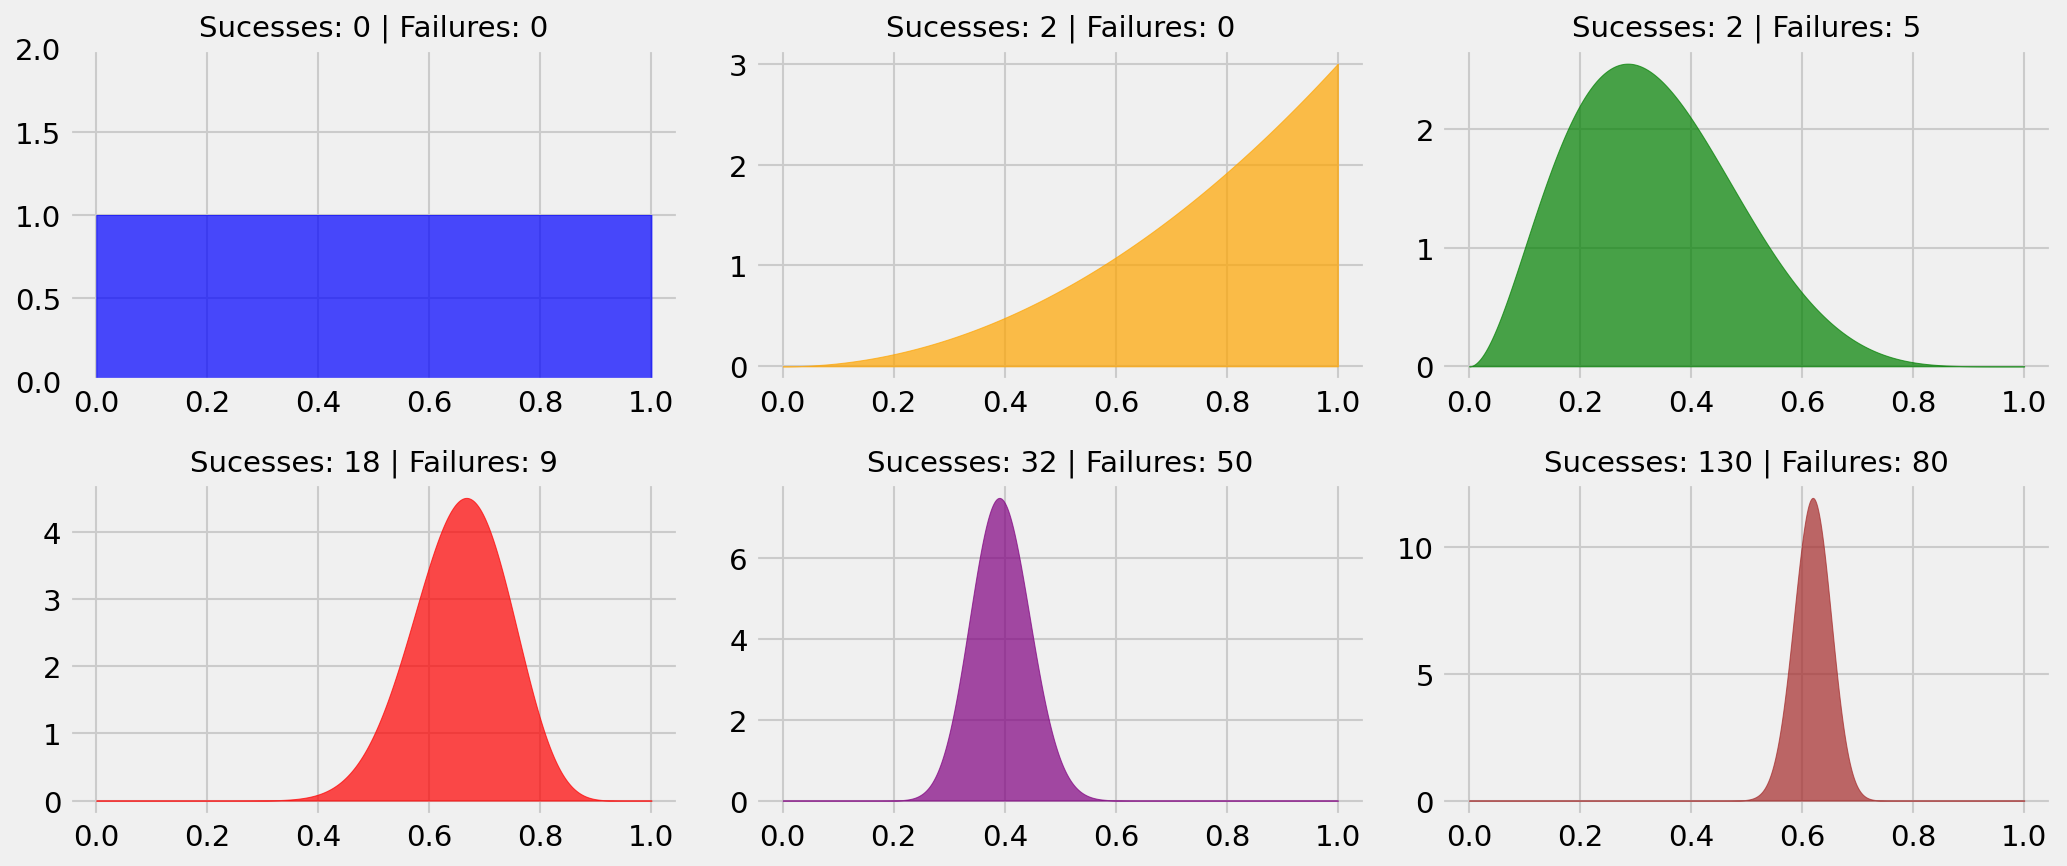

In [12]:
# clearing past figures
plt.close('all')

# examples 
beta_examples = [(0,0),(2,0),(2,5),(18,9),(32,50),(130,80)]

# colors for the plots
beta_colors = ['blue','orange','green','red','purple','brown']

# opening figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=150, nrows=2, ncols=3)

# loop for each 
for i, example in enumerate(beta_examples):
    
    # points to sample for drawing the curve
    X = np.linspace(0,1,1000)
    
    # generating the curve
    dist = beta_dist(1 + example[0],1 + example[1])
    curve = dist.pdf(X)
    
    # plotly data
    ax[int(i/3)][(i % 3)].fill_between(X, 0, curve, color=beta_colors[i], alpha=0.7)
    ax[int(i/3)][(i % 3)].set_title('Sucesses: {} | Failures: {}'.format(example[0],example[1]), fontsize=14)

# some adjustments
ax[0][0].set(ylim=[0,2])
plt.tight_layout()
#plt.

# showing the figure
plt.show()